In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.18.0'

In [ ]:
DATA_ROOT = ("/content/drive/MyDrive/training_images")

In [ ]:
pd.set_option("display.precision", 8)

In [ ]:
IMG_SHAPE = (224, 224)

In [ ]:
TRAINING_DATA_DIR = str(DATA_ROOT)

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = "validation",
    shuffle = True,
    target_size = IMG_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = "training",
    shuffle = True,
    target_size = IMG_SHAPE
)

Found 844 images belonging to 3 classes.
Found 3380 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 3))

In [ ]:
label_batch[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
print(train_generator.class_indices)

{'high_renaissance': 0, 'meiji_period': 1, 'rococo': 2}


In [ ]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f :
  f.write(labels)
!cat labels.txt

high_renaissance
meiji_period
rococo

In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
IMAGE_SIZE = 224

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras.utils as utils

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=5,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units=train_generator.num_classes,
        activation="softmax"
    )
])
model.build([None, 224, 224, 3])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │         559,875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 580,803 (2.22 MB)

 Trainable params: 580,803 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
steps_per_epoch = int(np.ceil(train_generator.samples/train_generator.batch_size))

val_steps_per_epoch = int(np.ceil(valid_generator.samples/valid_generator.batch_size))
hist = model.fit(
  train_generator,
  epochs=5,
  verbose=1,
  steps_per_epoch=steps_per_epoch,
  validation_data=valid_generator,
  validation_steps=val_steps_per_epoch
).history

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.9964 - loss: 0.0159 - val_accuracy: 0.8649 - val_loss: 0.7412
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.9998 - loss: 0.0069 - val_accuracy: 0.8803 - val_loss: 0.8973
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8791 - val_loss: 0.8887
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 1.0000 - loss: 4.6213e-04 - val_accuracy: 0.8839 - val_loss: 0.9423
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 1.0000 - loss: 3.1481e-04 - val_accuracy: 0.8827 - val_loss: 0.9261


In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 997ms/step - accuracy: 0.8716 - loss: 1.0832
Final loss: 0.93
Final accuracy: 88.27%


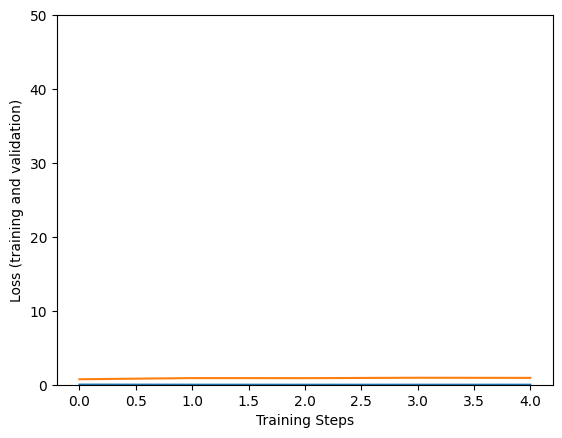

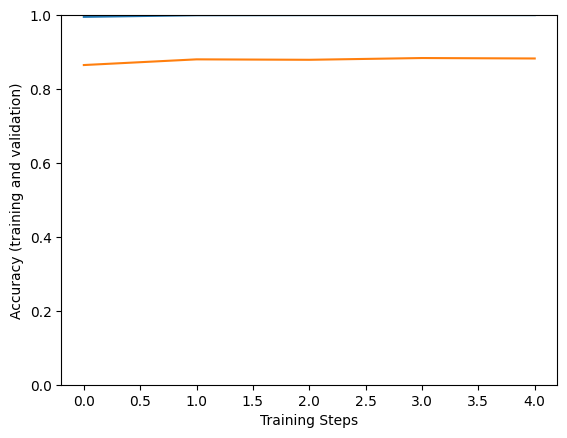

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")

plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()

plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['High_Renaissance' 'Meiji_Period' 'Rococo']


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
Prediction results shape: (32, 3)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['High_Renaissance' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo'
 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo'
 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Meiji_Period' 'Rococo'
 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo' 'Rococo'
 'Rococo' 'Rococo']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
Prediction results shape: (32, 3)


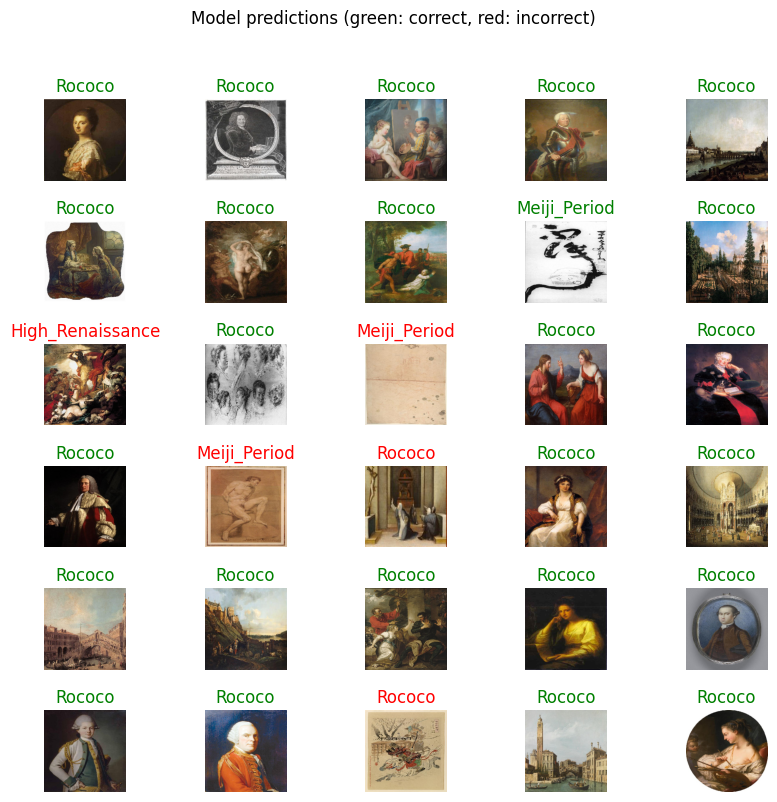

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")